In [1]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [3]:
# Read the CSV file
import pandas as pd
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
# Define features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

In [14]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

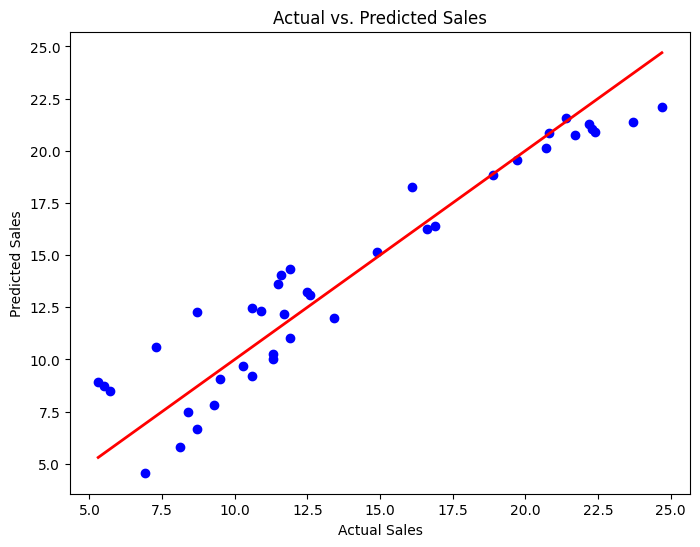

In [18]:
# Visualization of predicted vs. actual sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

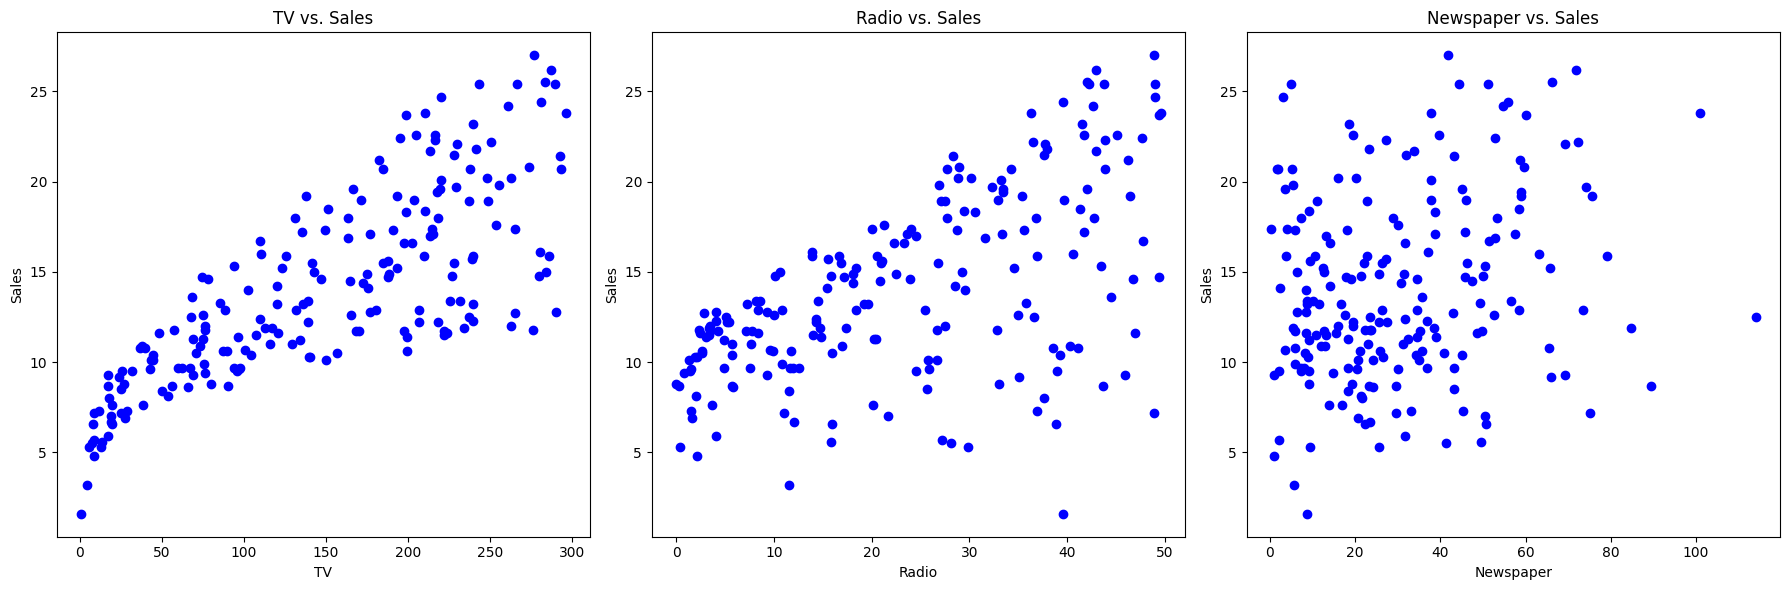

In [20]:
# Feature vs. Target Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    axes[i].scatter(data[feature], data['Sales'], color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sales')
    axes[i].set_title(f'{feature} vs. Sales')

plt.tight_layout()
plt.show()

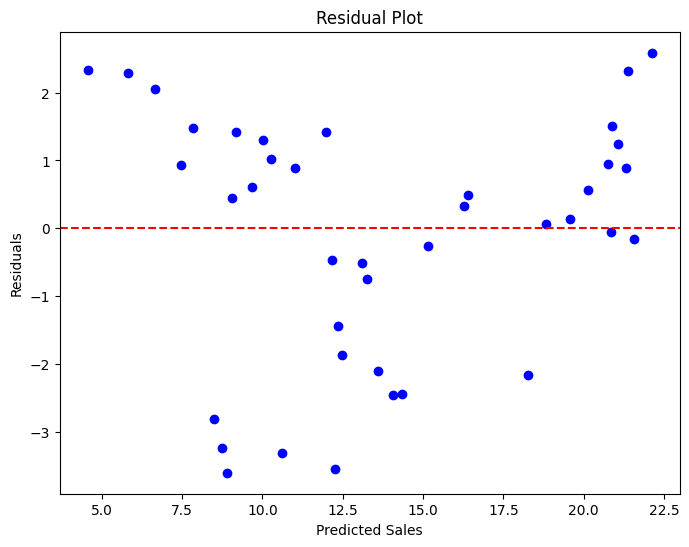

In [21]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [23]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.1740973539761033
R-squared Score: 0.899438024100912


In [25]:
# Retrieve coefficients assigned to each feature
coefficients = model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance)

Feature Importance:
     Feature  Coefficient  Absolute Coefficient
1      Radio     0.189195              0.189195
0         TV     0.044730              0.044730
2  Newspaper     0.002761              0.002761


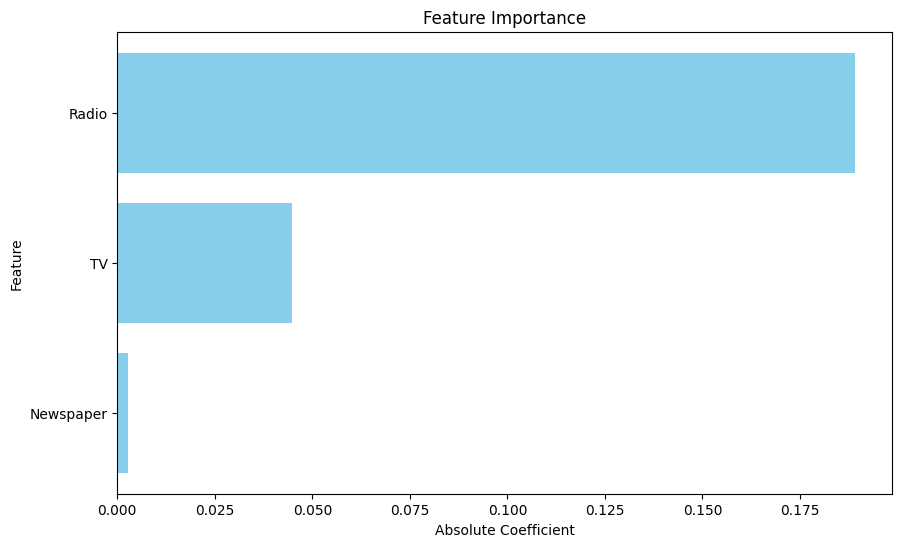

In [26]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()